## Tmdb Movie Dataset EDA - The Effects of Budget on Popularity

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I have chosen the TMDb movie data set for data analysis. The TMDB movie dataset contains information about 10,866 movies collected from The Movie Database (TMDb), including user ratings and revenue. I would like to find other intresting patterns in the dataset.This project aims to discover the relationship between a movie's budget and popularity, genre and profit. 

It contains 21 columns with the following column names:

* id              - id     
    * imdb_id         - imdb id  
    * popularity   -  It helps us boost search results. cumulative decided by number of star ratings, views, release date, how many times it was marked as a favoutite and so on         
    * budget   - The budget of the movie in USD             
    * revenue  -   Amount of revenue in USD       
    * original_title    - The original title of the movie
    * cast         - Major cast members 
    * homepage     - The website homepage for the movie
    * director      - Movie dirrector        
    * tagline       - Tagline of the movie     
    * keywords      - Search keywords  
    * overview      - A brief synopsis of the movie
    * runtime     - Length of the movie in minutes             
    * production_companies   - Production companies involved in movie production
    * release_date           - Date of release
    * vote_count             - Number of votes
    * vote_average           - Average votes
    * release_year           - Year of release
    * budget_adj             - Adjusted budget accounting for inflation over time.
    * revenue_adj            - Adjusted revenue accounting for inflation over time.


### Question(s) for Analysis

* **Do movies with bigger budgets become more popular?**
    
    This question aims to determine how the set budget for a movie affects the movies popularity. It is possible that popularity will lead to more views and consequently, a higher revenue.


* **What genre's generate more profit?**
    
    This question aims to determine if particular genres are more successful than others. 

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
# Loading the dataset and viewing the first few rows
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Checking out the data type for each column and for misssing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.shape

(10866, 21)

The dataset has 10866 rows and 21 columns.

Six columns have the int64 data type

4 columns have the float64 data type

11 columns have the object data type

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


A lot of the columns have missing values. It also appears that the cast, genres and production_companies columns have strange formatting because most of the cells contain more than one value.

The minimum values for budget and revenue is 0. This appears to be missing values since the chances of a movie's budget being 0 is very low.

The dataset contains movies from 1960 - 2015

In [7]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.duplicated().sum()

1

9 columns have missing values and there's one duplicate row

In [9]:
len(df[df["budget"] == 0]) == len(df[df["budget_adj"] == 0])

True

In [10]:
len(df[df["budget"] == 0])

5696

In [11]:
len(df[df["revenue"] == 0])

6016

The budget_adj and revenue_adj columns contain the adjusted budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. There are 5696 and 6016 rows with 0 as the value for their budget and revenue respectively.


### Data Cleaning

 

In [12]:
# Dropping all rows where revenue and budget is equal to 0.

df.drop(df[df["revenue"]==0].index, inplace=True)
df.drop(df[df["budget"]==0].index, inplace=True)

In [13]:
# Dropping columns that are irrelevant to the questions asked.

to_drop = ["imdb_id", "budget_adj", "revenue_adj", "cast", "homepage", "tagline", "keywords", "overview", "production_companies", "release_date", "vote_count"]
df.drop(columns=to_drop, inplace=True)

In [14]:
# Dropping duplicate rows and rows wit missing values

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [15]:
# Splitting the genres column and selecting only the first genre

df.genres = df["genres"].apply(lambda x: x.split("|")[0])

In [16]:
df.genres.value_counts()

Drama              889
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Q1: Do movies with bigger budgets become more popular? 

To answer this question, I calculated the correlation coefficient between all the features with a particular focus on budget and popularity. 

The correlation between budget and popularity = 0.447. This imploeas that there is an association between these two features. 

This could also indicate a predictive relationship that can be exploited further.

In [20]:
# Setting the style and figure size

sns.set(rc={"figure.figsize": (12, 6)})
sns.set(style="whitegrid")

In [21]:
# Calculate profit and return on investment
df["profit"] = df["revenue"] - df["budget"]
df["ROI"] = (df["profit"]/df["budget"]) * 100

In [24]:
adventure = df[df["genres"] == "Adventure"]

In [25]:
adventure.sort_values(by="ROI", ascending=False)

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year,profit,ROI
10495,8856,0.772494,113,115103979,"The Karate Kid, Part II",John G. Avildsen,113,Adventure,5.8,1986,115103866,1.018618e+08
7827,9659,2.012021,400000,100000000,Mad Max,George Miller,93,Adventure,6.5,1979,99600000,2.490000e+04
1329,11,12.037933,11000000,775398007,Star Wars,George Lucas,121,Adventure,7.9,1977,764398007,6.949073e+03
10499,9671,0.680643,5000000,328203506,Crocodile Dundee,Peter Faiman,97,Adventure,6.2,1986,323203506,6.464070e+03
9849,646,3.170651,1100000,59600000,Dr. No,Terence Young,110,Adventure,6.7,1962,58500000,5.318182e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
2244,46528,0.250540,425000000,11087569,The Warrior's Way,Sngmoo Lee,100,Adventure,6.4,2010,-413912431,-9.739116e+01
6728,9053,0.458112,21000000,480314,DOA: Dead or Alive,Corey Yuen Kwai,87,Adventure,4.9,2006,-20519686,-9.771279e+01
6639,7512,0.848086,30000000,495303,Idiocracy,Mike Judge,84,Adventure,6.1,2006,-29504697,-9.834899e+01
4341,10448,0.129344,20000000,305070,Rapa Nui,Kevin Reynolds,107,Adventure,6.2,1994,-19694930,-9.847465e+01


The Karate Kid, Part II has a profit of 115,103,866. This high value is due to the very low budget of 113. This appears to be an error. This entry will be dropped to reduce the number of outliers in the Adventure genre.

In [26]:
# Dropping the The Karate Kid, Part II entry
df.drop(index=10495, inplace=True)

In [27]:
df.shape

(3852, 12)

In [28]:
df.corr()[["budget", "popularity"]]

,budget,popularity
id,-0.027634,0.188800
popularity,0.446892,1.000000
budget,1.000000,0.446892
revenue,0.688606,0.615508
runtime,0.261679,0.215663
vote_average,0.023975,0.317789
release_year,0.267976,0.173350
profit,0.526913,0.596211
ROI,-0.025349,-0.013538


In [29]:
corr = df.corr()

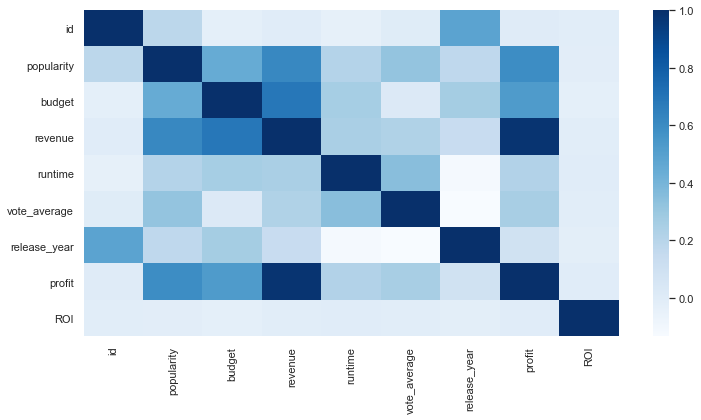

In [30]:
sns.heatmap(corr, cmap="Blues");

The heatmap shows the correlation between features. 
   * Revenue has a positive correlation with popularity and budget
   * Popularity also has a positive correlation with budget

In [31]:
df["budget"].describe()

count    3.852000e+03
mean     3.722193e+07
std      4.221157e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [32]:
# This line of code categorises bugdet into High, Low and Medium
df["budget_cat"] = pd.cut(x=df["budget"], bins=[0, 24000000, 50000000, 500000000], labels=["Low Budget", "Mid Budget", "High Budget"])

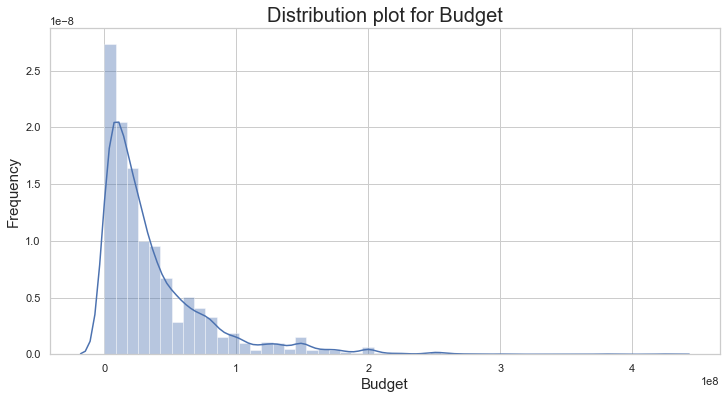

In [33]:
sns.distplot(df["budget"])

plt.title('Distribution plot for Budget', fontsize=20)
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Frequency', fontsize=15);

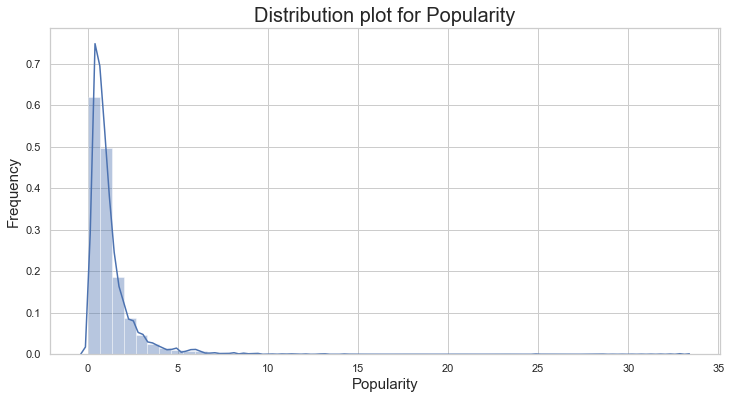

In [34]:
sns.distplot(df["popularity"])

plt.title('Distribution plot for Popularity', fontsize=20)
plt.xlabel('Popularity', fontsize=15)
plt.ylabel('Frequency', fontsize=15);

The distribution for budget and popularity are skewed to the right. this means that there are a lot of outliers in these columns. Popular movies are not so common and there also exists more movies with low budgets than high budgets.

In [35]:
df["budget_cat"].value_counts()

Low Budget     1944
Mid Budget     1014
High Budget     894
Name: budget_cat, dtype: int64

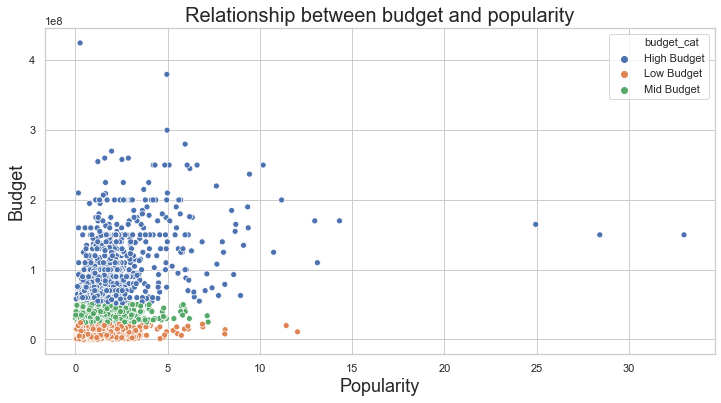

In [36]:
sns.scatterplot(data=df, x="popularity", y="budget", hue="budget_cat")

plt.title('Relationship between budget and popularity', fontsize=20)
plt.xlabel('Popularity', fontsize=18)
plt.ylabel('Budget', fontsize=18);

Popularity correlates more with high budget movies than the low budget or medium budget ones. As the budget increases, the popularity also increases.

### Q2: What genres generate more profit?

This question aims to determinr the most profitable genres. This can provide significant information to potential investors. To answer this question, I calculated the mean return on investment for each genre and focused on the top 10.

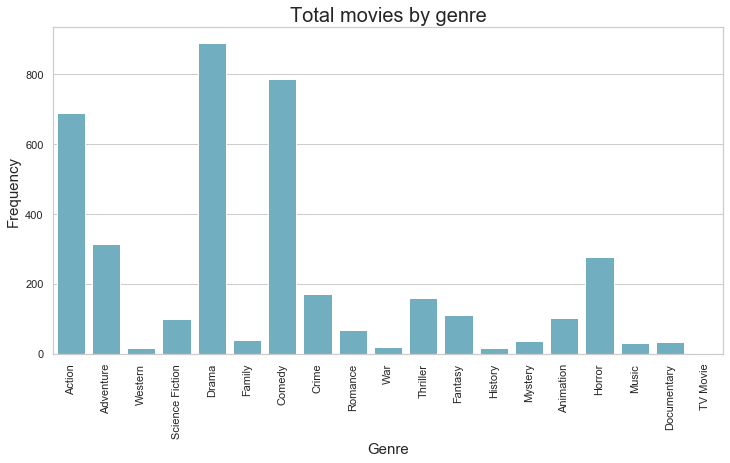

In [37]:
sns.countplot(df["genres"], color="c")

plt.title('Total movies by genre', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Frequency', fontsize=15);
plt.xticks(rotation=90);

The dataset contains more drama movies and less of Western, War, History and Musical movies

In [38]:
# Top 5 genres with the highest Return on Investment
df.groupby("genres")["ROI"].describe().loc[:, ["mean", "std"]].sort_values(by="mean", ascending=False)[:10]


,mean,std
genres,,
Comedy,11515.029627,230289.877099
Horror,9375.238871,97890.044743
Documentary,2227.078011,7845.705491
Science Fiction,1132.668690,7094.562911
TV Movie,740.000000,NaN
Family,440.871629,857.150601
Adventure,411.042887,1596.361906
History,402.657544,560.166429
Drama,358.290392,1678.647350


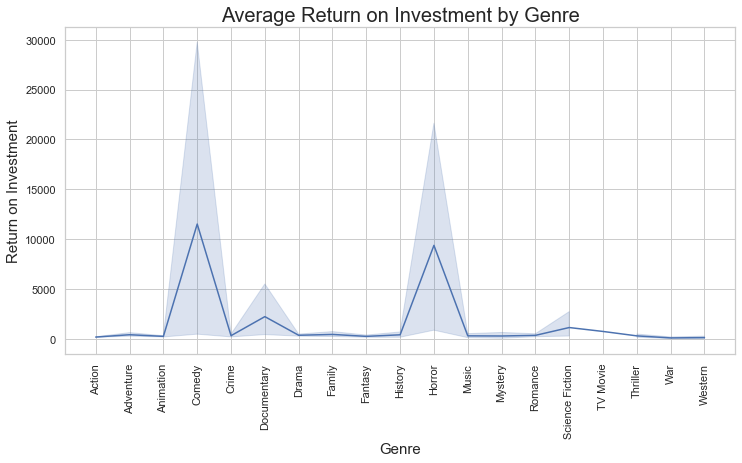

In [39]:
sns.lineplot(data=df, x="genres", y="ROI")

plt.title('Average Return on Investment by Genre', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Return on Investment', fontsize=15);
plt.xticks(rotation=90);

The comedy movie genre has the highest average return on investment, with a mean ROI of 11515.03. This can be seen from the highest peak of the line plot.

This is followed by the Horror genre with a mean ROI of 9375.24

However, the large standard deviations (230289.87 & 97890.04) of the ROIs of these genres imply the presence of outliers. This can also be seen from the line plot above.

<a id='conclusions'></a>
## Conclusions

* The adventure movie genre has the highest average return on investment.
* Popularity correlates more with high budget movies than the low budget or medium budget ones. As the budget increases, the popularity also increases.


**Limitation**: The dataset contains a lot of null values that had to be dropped. This affected the overall analysis. A more larger dataset with less missing values would lead to a more conclusive analysis of the relationships between features.

The dataset is also inbalanced. Some genres occur more significantly than others. The minority genres cannot contriute significantly to the analysis.




#### References:
N/A